# Task
Import the data from "/content/Week-2-Sales-Data(in).csv" into a pandas DataFrame, check for and handle missing values and duplicates, and verify data types.

## Load data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

df = pd.read_csv("/content/Week-2-Sales-Data(in).csv")
display(df.head())

,Order_ID,Product,Region,Units_Sold,Unit_Price,Revenue,Sales_Rep,Order_Date
0,ORD001,Printer,Limpopo,45,2985,134325,Rep-2,3/28/2024
1,ORD002,Headphones,Western Cape,16,15076,241216,Rep-18,4/11/2024
2,ORD003,Laptop,Western Cape,45,14860,668700,Rep-16,5/18/2024
3,ORD004,External Hard Drive,KwaZulu-Natal,21,16237,340977,Rep-3,5/16/2024
4,ORD005,Smartphone,Western Cape,41,9420,386220,Rep-17,2/21/2024


### Subtask:
Check for missing values, duplicates, and incorrect data types, and clean the dataset.

In [15]:
# 1.1 Check for missing values, duplicates, and incorrect data types.

# Check for missing values
missing_values = df.isnull().sum()
print("1.1.1 Missing values per column:")
display(missing_values)

# Check for duplicate rows
duplicatesBeforeDrop = df.duplicated().sum()
print(f"\n1.1.2 The total number of duplicate rows prior dropping: {duplicatesBeforeDrop}")

# Verify data types
data_types = df.dtypes
print("\n1.1.3 Data types before conversion:")
display(data_types)

# 1.2 Clean the dataset

# 1.2.1 Removing duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = len(df)
duplicatesDroppedCount = initial_rows - rows_after_dropping_duplicates

if duplicatesDroppedCount > 0:
    print(f"\nDropped {duplicatesDroppedCount} duplicate rows.")
else:
    print("\n1.2.1 No duplicate rows were dropped.")

# 1.2.2 Drop or fill
#  Droping rows with any missing values.
rowsBefore= len(df)
df.dropna(inplace=True)
rowsAfterDrop = len(df)
na_dropped_count =rowsBefore -rowsAfterDrop

if na_dropped_count > 0:
    print(f"Dropped {na_dropped_count} rows with missing values.")
else:
    print("1.2.2 No rows with missing values were dropped.")

# 1.2.3 Converting columns "Order_Date" to proper datetime format
try:
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    print("\n1.2.3'Order_Date' column converted to datetime format.")
except Exception as e:
    print(f"\n Error converting 'Order_Date' to datetime: {e}")
    rows_before_final_date_drop = len(df)
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
    df.dropna(subset=['Order_Date'], inplace=True)
    rows_after_final_date_drop = len(df)
    final_date_dropped_count = rows_before_final_date_drop - rows_after_final_date_drop
    if final_date_dropped_count > 0:
        print(f"Dropped {final_date_dropped_count} rows with invalid dates.")


# Verify data types after conversion
print("\nData types after cleaning and conversion:")
display(df.dtypes)

print("\nCleaned DataFrame head:")
display(df.head())

1.1.1 Missing values per column:


,0
Order_ID,0
Product,0
Region,0
Units_Sold,0
Unit_Price,0
Revenue,0
Sales_Rep,0
Order_Date,0



1.1.2 The total number of duplicate rows prior dropping: 0

1.1.3 Data types before conversion:


,0
Order_ID,object
Product,object
Region,object
Units_Sold,int64
Unit_Price,int64
Revenue,int64
Sales_Rep,object
Order_Date,datetime64[ns]



1.2.1 No duplicate rows were dropped.
1.2.2 No rows with missing values were dropped.

1.2.3'Order_Date' column converted to datetime format.

Data types after cleaning and conversion:


,0
Order_ID,object
Product,object
Region,object
Units_Sold,int64
Unit_Price,int64
Revenue,int64
Sales_Rep,object
Order_Date,datetime64[ns]



Cleaned DataFrame head:


,Order_ID,Product,Region,Units_Sold,Unit_Price,Revenue,Sales_Rep,Order_Date
0,ORD001,Printer,Limpopo,45,2985,134325,Rep-2,2024-03-28
1,ORD002,Headphones,Western Cape,16,15076,241216,Rep-18,2024-04-11
2,ORD003,Laptop,Western Cape,45,14860,668700,Rep-16,2024-05-18
3,ORD004,External Hard Drive,KwaZulu-Natal,21,16237,340977,Rep-3,2024-05-16
4,ORD005,Smartphone,Western Cape,41,9420,386220,Rep-17,2024-02-21


### Subtask:
Calculate and display Key Performance Indicators (KPIs).

In [17]:
# 2. Calculate  KPIs

# Define a function to format currency
def format_zar(amount):
    return f"R {amount:,.2f}"

# 2.1 Total revenue for the entire dataset.
total_revenue = df['Revenue'].sum()
print(f"2.1 Total revenue for the entire dataset: {format_zar(total_revenue)}")

# 2.2 Average Number of units sold per order.
ave_units_sold = df['Units_Sold'].mean()
print(f"\n2.2 Average units sold per order: {ave_units_sold:.2f}")

# 2.3 Total revenue per region.
revenueRperRegion = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print("\n2.3 A total revenue per region:")
display(revenueRperRegion.apply(format_zar))

# 2.4 Highest revenue-generating sales representative.
revenuePerSalesRep = df.groupby('Sales_Rep')['Revenue'].sum().sort_values(ascending=False)
highestRevenueSalesRep =revenuePerSalesRep.index[0]
highest_revenue = revenuePerSalesRep.iloc[0]
print(f"\n2.4 Highest revenue-generating sales representative: {highestRevenueSalesRep} with revenue of {format_zar(highest_revenue)}") # currency formatting here

# 2.5 Top 3 products by total units sold.
units_sold = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False)
topProducts = units_sold .head(3)
print("\n2.5 Top 3 products by total units sold:")
display(topProducts)


2.1 Total revenue for the entire dataset: R 35,295,338.00

2.2 Average units sold per order: 28.23

2.3 A total revenue per region:


,Revenue
Region,
Western Cape,"R 9,346,198.00"
Gauteng,"R 6,231,531.00"
North West,"R 6,201,288.00"
Limpopo,"R 3,614,655.00"
KwaZulu-Natal,"R 3,560,630.00"
Free State,"R 3,359,398.00"
Eastern Cape,"R 2,981,638.00"



2.4 Highest revenue-generating sales representative: Rep-19 with revenue of R 2,889,294.00

2.5 Top 3 products by total units sold:


,Units_Sold
Product,
Smartwatch,542
Tablet,511
Smartphone,437


### Subtask:
Visualize the Key Performance Indicators (KPIs).

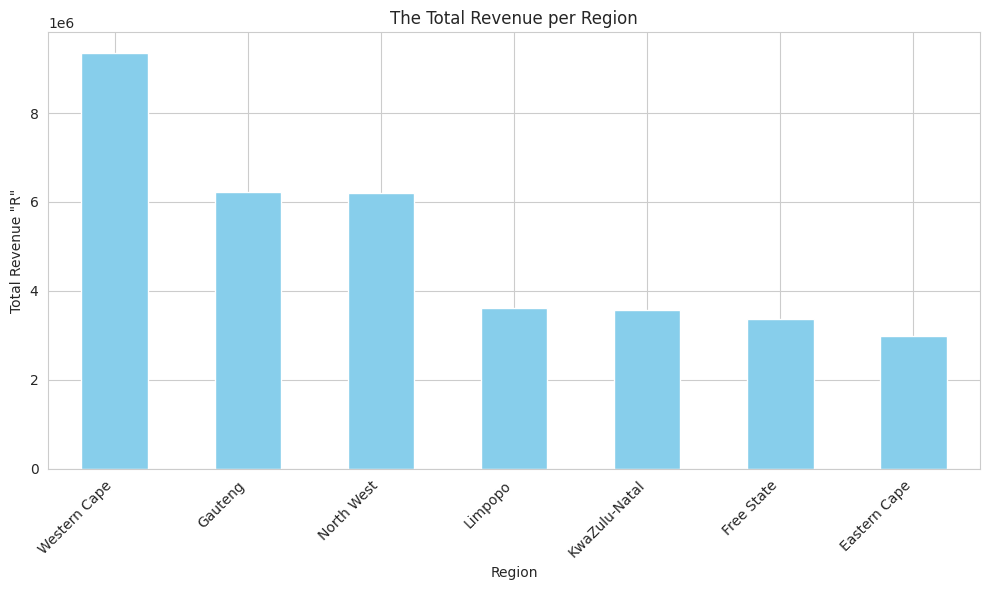

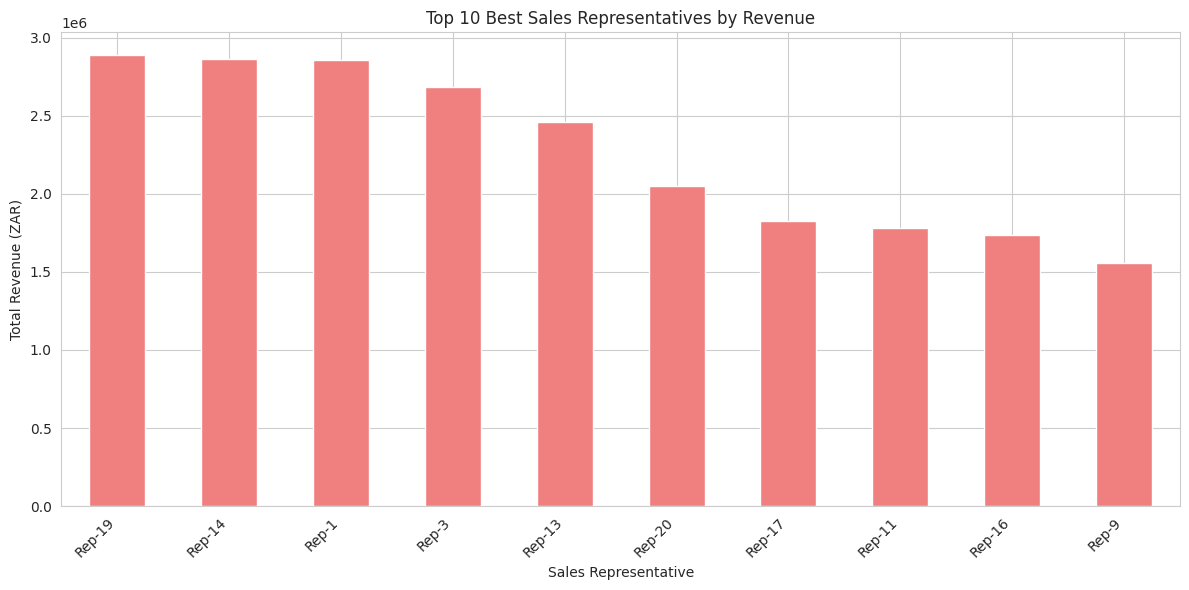

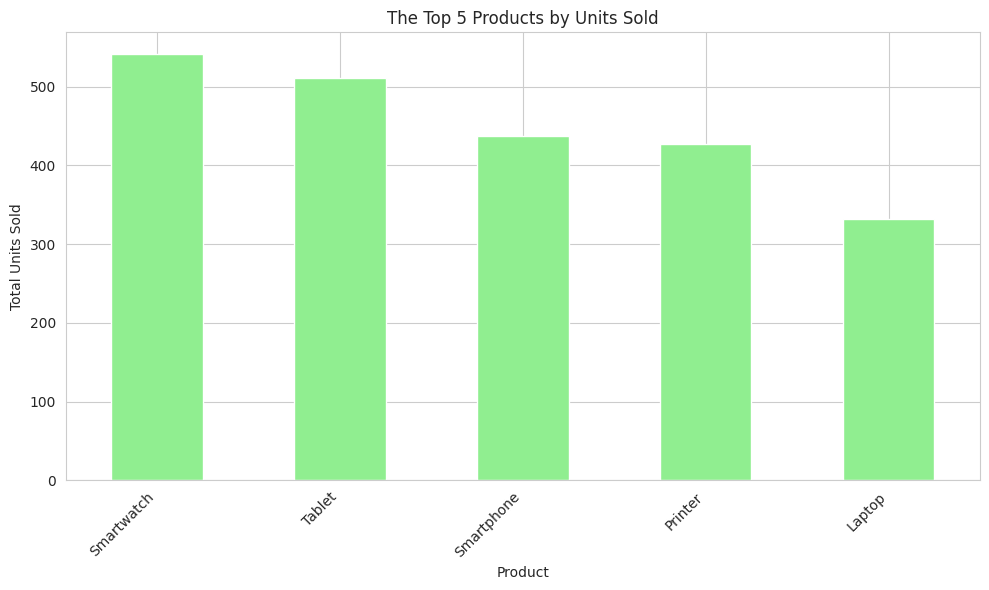

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style for the plots
sns.set_style("whitegrid")
print("\n")
# 3.1 Visualizing Total Revenue per Region
plt.figure(figsize=(10, 6))
revenue_per_region.plot(kind='bar', color='skyblue')
plt.title('The Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue "R"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n")
# 3.2 The Highest Revenue-Generating Sales Representatives (Top 10)
plt.figure(figsize=(12, 6))
top_10_sales_reps.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Best Sales Representatives by Revenue')
plt.xlabel('Sales Representative')
plt.ylabel('Total Revenue (ZAR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n")
# 3.3 Top 5 Products by Total Units Sold
plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='lightgreen')
plt.title('The Top 5 Products by Units Sold')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()